<a href="https://colab.research.google.com/github/bosco-morales/CAP4767/blob/main/Module_2_Implementing_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 2 - Implementing KMeans Clustering for Customer Segmentation
## Bosco M Morales - CAP4767-2243-4701 - Spring 2024

Environment Set-Up

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import altair as alt

## Task 1. Dataset Sourcing:

https://www.kaggle.com/datasets/aliessamali/ecommerce

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## Task 2. Exploratory Data Analysis (EDA):

Load the dataset into a Python environment using pandas.
Examine the first few rows of the dataset.
Check for missing values and decide how to handle them.
Perform statistical summaries of the data to understand distributions.

### Data Import

In [ ]:
#Import dataset
df = pd.read_csv("/content/Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379476 entries, 0 to 379475
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    379476 non-null  object 
 1   StockCode    379476 non-null  object 
 2   Description  378198 non-null  object 
 3   Quantity     379476 non-null  int64  
 4   InvoiceDate  379476 non-null  object 
 5   UnitPrice    379475 non-null  float64
 6   CustomerID   280165 non-null  float64
 7   Country      379475 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.2+ MB


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#Statistical summaries
df.describe()

,Quantity,UnitPrice,CustomerID
count,379476.000000,379475.000000,280165.000000
mean,9.840902,4.761692,15277.016365
std,179.527540,105.876196,1715.318356
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13881.000000
50%,3.000000,2.100000,15150.000000
75%,10.250000,4.130000,16779.000000
max,74215.000000,38970.000000,18287.000000


Based on the results from the min for Quantity and UnitPrice, outlier treatment is needed.

In [ ]:
df.describe(exclude='number')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,379476,379476,378198,379476,379475
unique,19109,3919,3998,17269,37
top,558475,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-06-29 15:58:00,United Kingdom
freq,705,1839,1886,705,346300


### Outliers

In [ ]:
def find_boundaries(df, variable,q1=0.05,q2=0.95):
    # the boundaries are the quantiles
    lower_boundary = df[variable].quantile(q1) # lower quantile
    upper_boundary = df[variable].quantile(q2) # upper quantile
    return upper_boundary, lower_boundary
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [ ]:
capping_outliers(df,'Quantity')
capping_outliers(df,'UnitPrice')

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,379476.000000,379475.000000,280165.000000
mean,7.090322,3.098933,15277.016365
std,8.154111,2.649122,1715.318356
min,1.000000,0.420000,12346.000000
25%,1.000000,1.250000,13881.000000
50%,3.000000,2.100000,15150.000000
75%,10.250000,4.130000,16779.000000
max,30.000000,9.950000,18287.000000


### Duplicates

In [ ]:
# Check for duplicates
%time
# Check for duplicates. Omitting Accident_Index
n_duplicates = df.duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
You seem to have 3060 duplicates in your database.


In [ ]:
df.shape

(379476, 8)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(376416, 8)

### Missing Values

Text(158.22222222222223, 0.5, 'Sample Number')

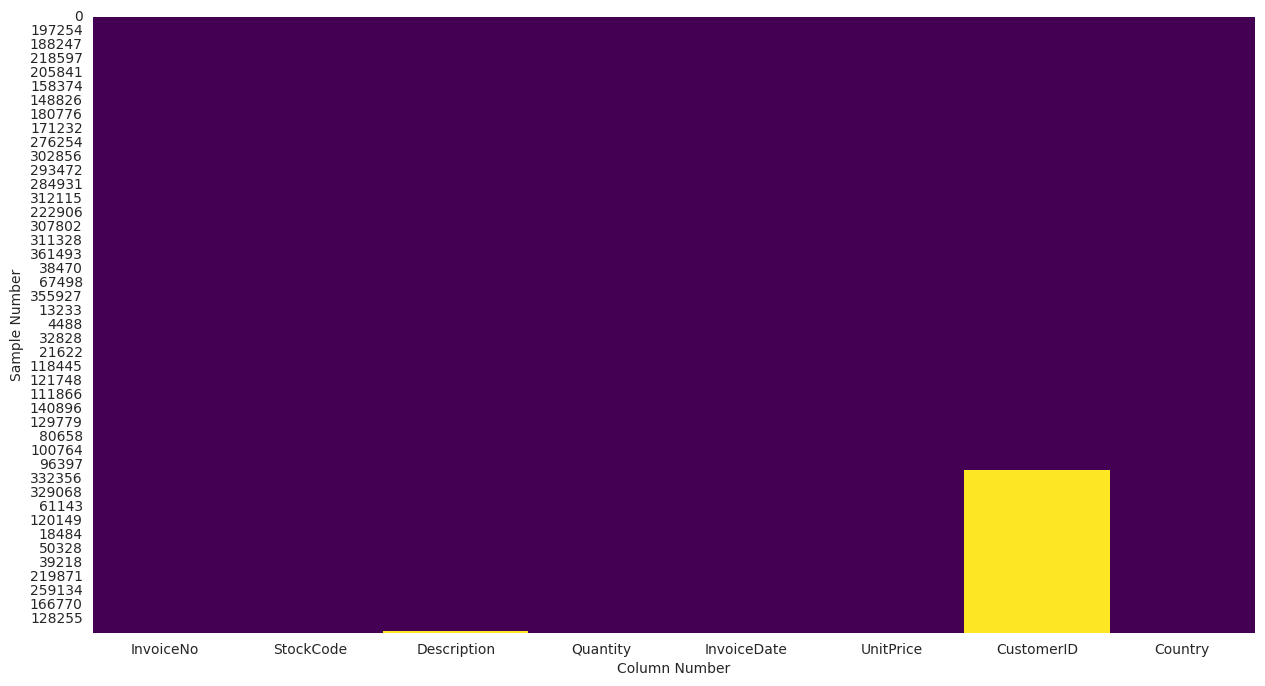

In [ ]:
# Missing Values (per sample/row)
# Take a look at the BIG HOLES in the dataset
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

# g = sns.heatmap(df_X.isnull(), cbar=False, cmap='viridis')
g = sns.heatmap(df.loc[df.isnull().sum(1).sort_values(ascending=True).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')
# Remember to view this from the ROW perspective.

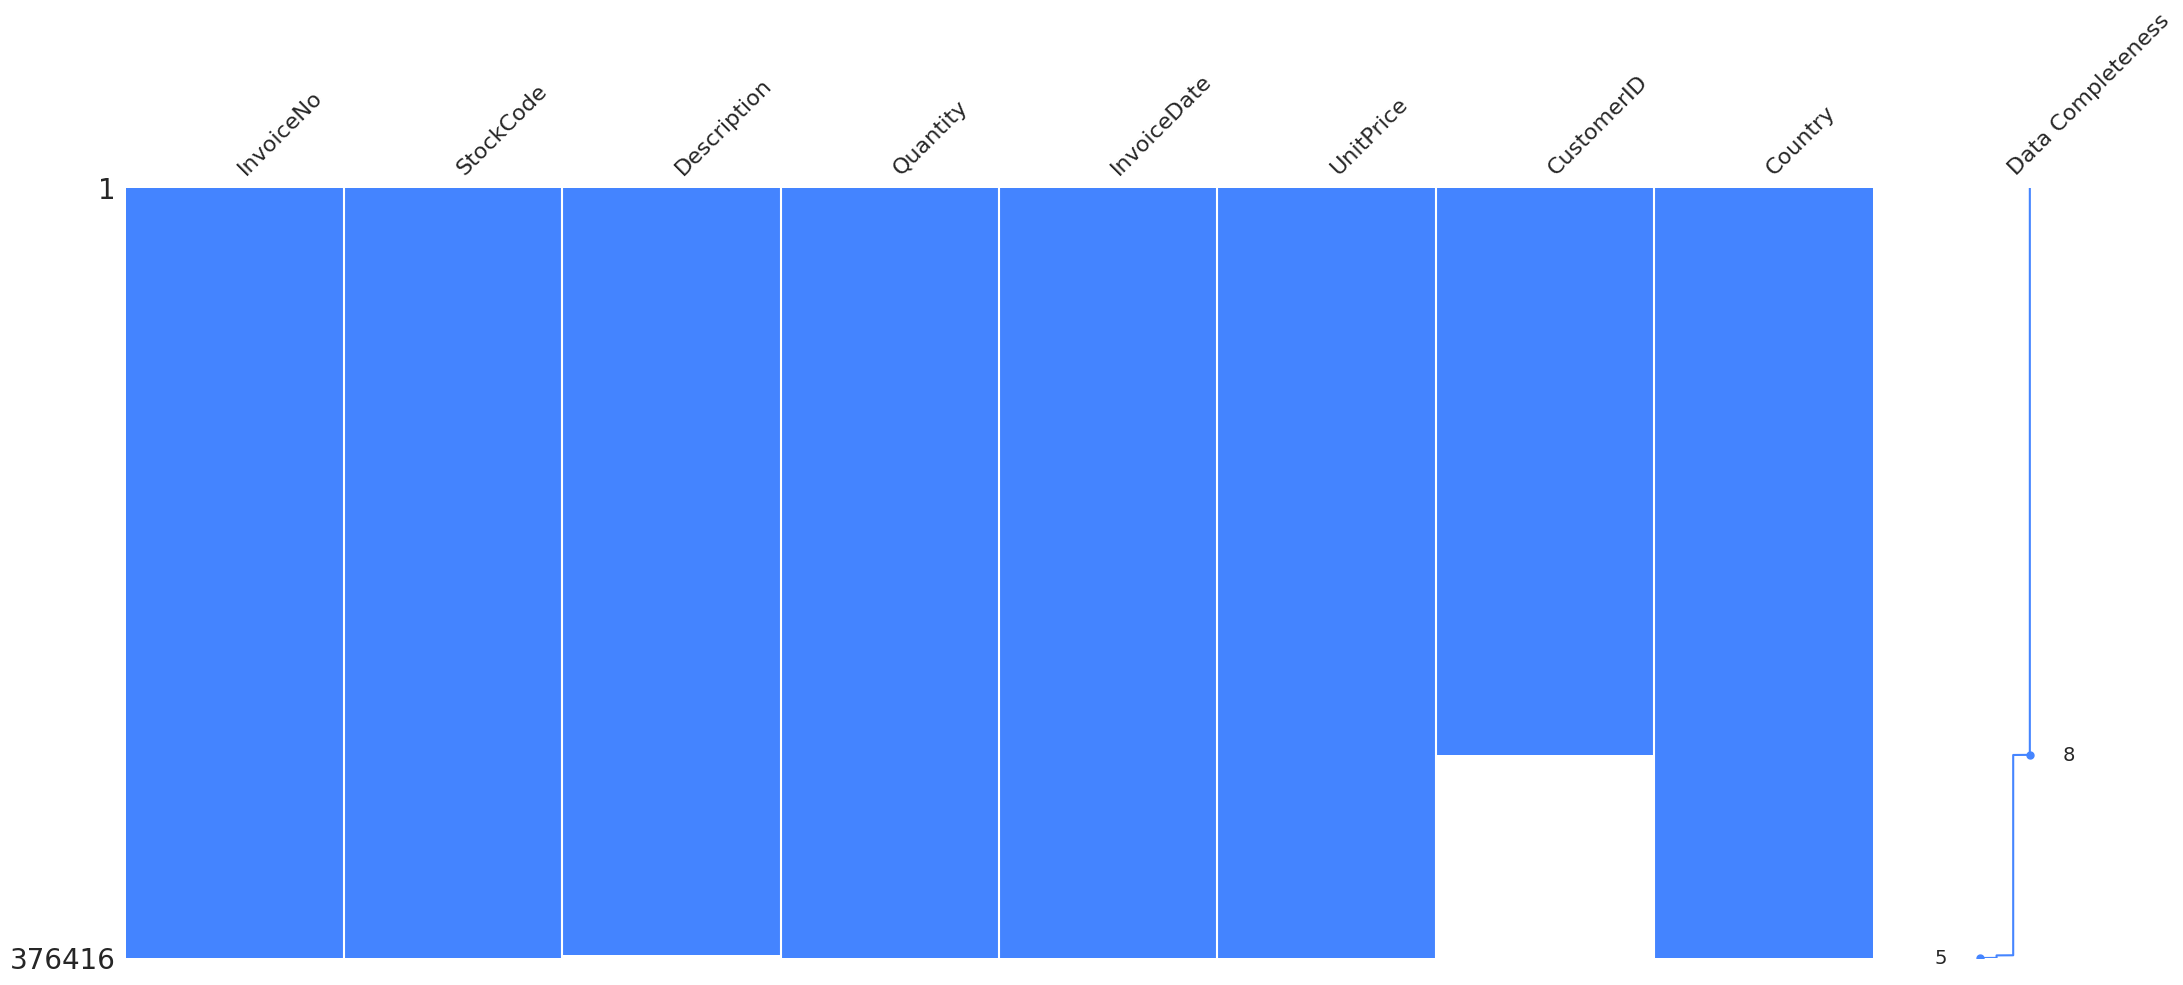

In [ ]:
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)

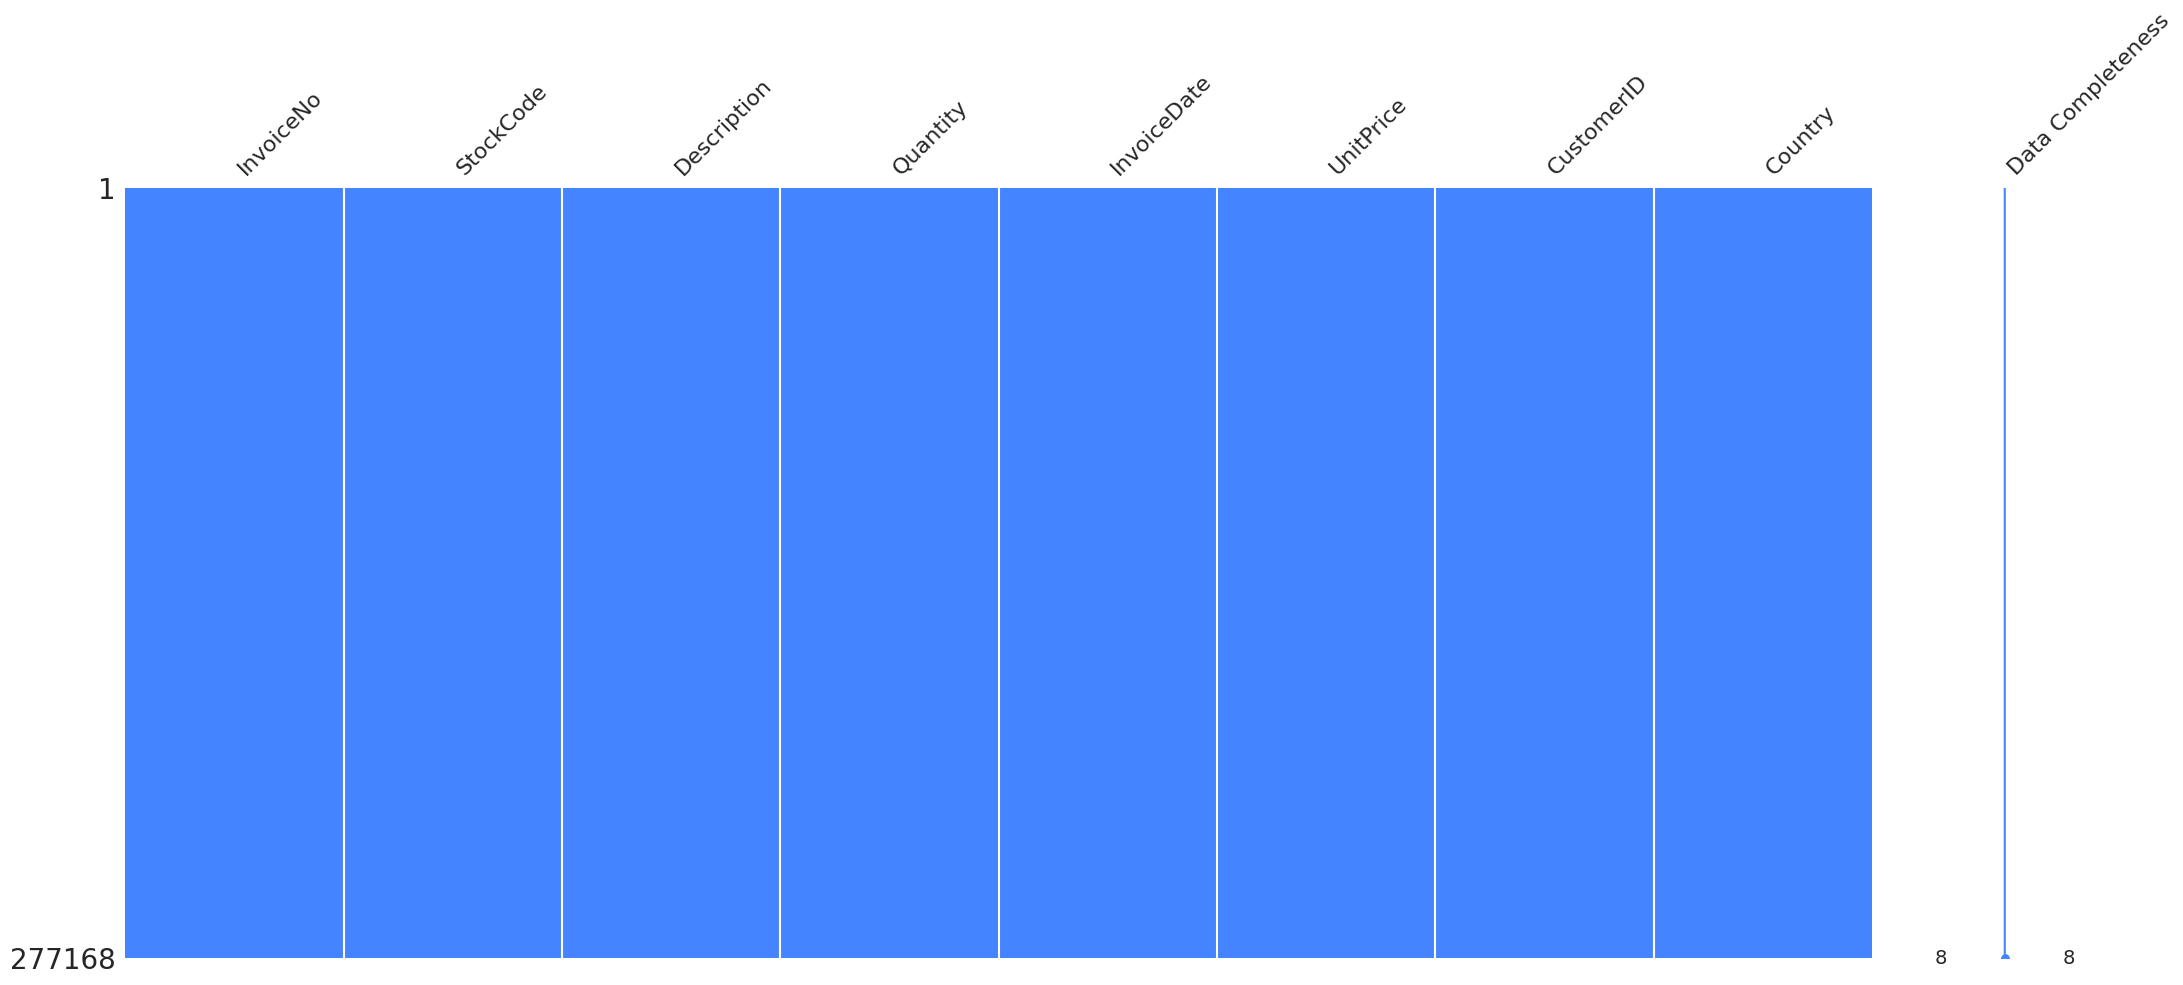

In [ ]:
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

### Remove columns

For this analysis the columns of importance are: InvoiceNo, InvoiceDate, CustomerID, Quantity, and UnitPrice.

In [ ]:
#Get list of all columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277168 entries, 0 to 379474
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    277168 non-null  object 
 1   StockCode    277168 non-null  object 
 2   Description  277168 non-null  object 
 3   Quantity     277168 non-null  float64
 4   InvoiceDate  277168 non-null  object 
 5   UnitPrice    277168 non-null  float64
 6   CustomerID   277168 non-null  float64
 7   Country      277168 non-null  object 
dtypes: float64(3), object(5)
memory usage: 19.0+ MB


In [ ]:
#Drop unncessary columns
df.drop(columns=['StockCode', 'Description','Country'], inplace=True)

In [ ]:
#Verify tat all changes were applied to dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277168 entries, 0 to 379474
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    277168 non-null  object 
 1   Quantity     277168 non-null  float64
 2   InvoiceDate  277168 non-null  object 
 3   UnitPrice    277168 non-null  float64
 4   CustomerID   277168 non-null  float64
dtypes: float64(3), object(2)
memory usage: 12.7+ MB


## Task 3. Data Preprocessing:
Prepare your data for clustering.

Choose relevant features for segmentation (e.g., purchase frequency, recency of purchases, total spend). *could be ANY columns
Create new features if needed (e.g., total spend per transaction).
Normalize the features using StandardScaler or another scaling method.

In [ ]:
# Convert InvoiceDate from string to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate total spend for each transaction
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

#Make CustomerID a string
df['CustomerID'] = df['CustomerID'].apply(str)

In [ ]:
df.dtypes

InvoiceNo              object
Quantity              float64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
TotalSpend            float64
dtype: object

 Aggregating Data at Customer Level

In [ ]:
# Aggregate data by CustomerID
customer_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (x.max() - x.min()).days,
    'InvoiceNo': 'count',
    'TotalSpend': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency'})

## Task 4. Applying the Elbow Method:
Determine the optimal number of clusters using the Elbow Method.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

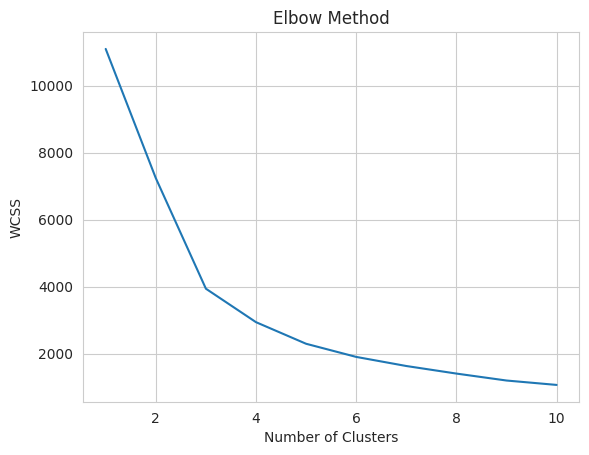

In [ ]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['Recency', 'Frequency', 'TotalSpend']])

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
customer_data.dtypes

Recency         int64
Frequency       int64
TotalSpend    float64
Cluster         int32
dtype: object

Based on the eyeball test of the above graph, 3 seems to be the best number of clusters.

## Task 5. KMeans Clustering:
Implement the KMeans algorithm with the identified number of clusters.

Fit the model to your scaled features.
Predict the clusters and append them to your original dataframe.

In [ ]:
# Assuming optimal_clusters is determined from the Elbow plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Task 6. Analyzing and Visualizing the Clusters:

### Recency vs Total Spend ⏬

In [ ]:
chart = alt.Chart(customer_data).properties(
    width=800,
    height=500
)
scatter_plot = chart.mark_circle()
scatter_plot.encode(x='Recency', y='TotalSpend', color='Cluster:N')

alt.Chart(...)

### Frequency vs Total Spend ⏬

In [ ]:
chart = alt.Chart(customer_data).properties(
    width=800,
    height=500
)
scatter_plot = chart.mark_circle()
scatter_plot.encode(x='Frequency', y='TotalSpend', color='Cluster:N')

alt.Chart(...)

### Analysis of Segments ⏬

In [ ]:
# Analyzing cluster characteristics
cluster_analysis = customer_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'TotalSpend': 'mean'
})

In [ ]:
# round features to two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
cluster_analysis

,Recency,Frequency,TotalSpend
Cluster,,,
0,26.23,30.36,439.28
1,223.33,130.37,2144.57
2,297.92,1888.54,37212.87


Working here rn

In [ ]:
#Subset data for Cluster 0
cluster_zero = customer_data.loc[customer_data['Cluster'] == 0]

#Subset data for Cluster 1
cluster_one = customer_data.loc[customer_data['Cluster'] == 1]

#Subset data for Cluster 0
cluster_two = customer_data.loc[customer_data['Cluster'] == 2]

In [ ]:
cluster_zero.drop(['Cluster'], axis=1, inplace=True)
cluster_one.drop(['Cluster'], axis=1, inplace=True)
cluster_two.drop(['Cluster'], axis=1, inplace=True)


<ipython-input-41-cadee690d652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_zero.drop(['Cluster'], axis=1, inplace=True)
<ipython-input-41-cadee690d652>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_one.drop(['Cluster'], axis=1, inplace=True)
<ipython-input-41-cadee690d652>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_two.drop(['Cluster'], axis=1, inplace=True)


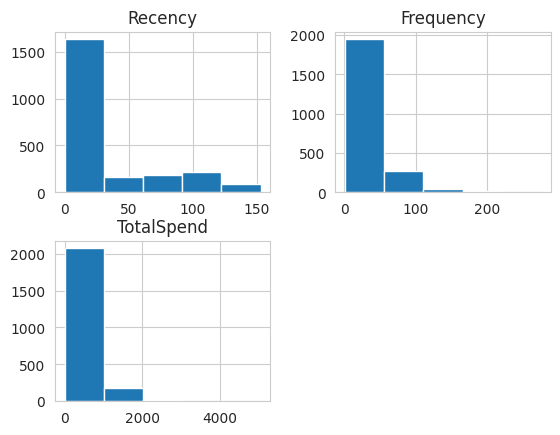

In [ ]:
hist = cluster_zero.hist(bins=5)

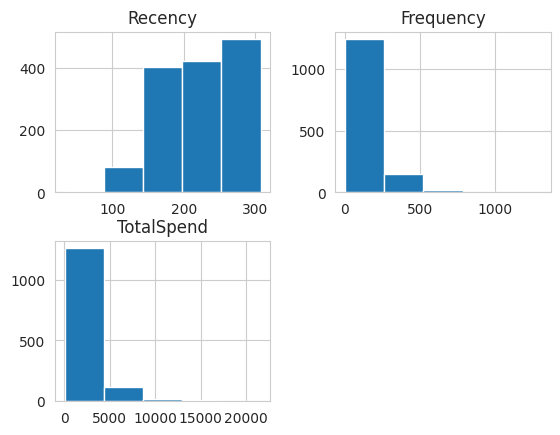

In [ ]:
hist = cluster_one.hist(bins=5)

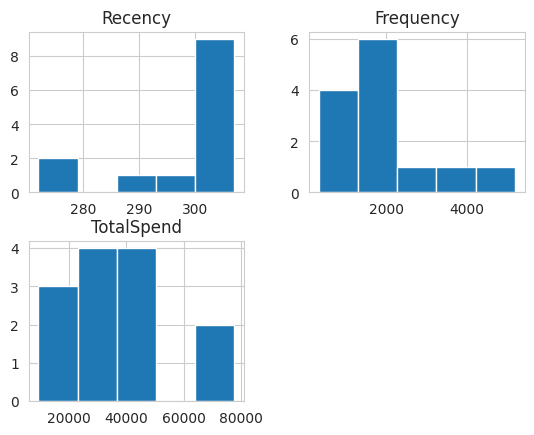

In [ ]:
hist = cluster_two.hist(bins=5)